In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/hotel_bookings.csv')
display(df) # Display the data


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Duplicated data

In [3]:
# Check for exact duplicated rows in the data 
df.duplicated().sum()

np.int64(31994)

In [4]:
# Check for duplicated rows in case there are any
# Note - It will return only the duplicated rows from the entire dataset
df.loc[df.duplicated(), :]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [5]:
# Dropping duplicate rows if any by keeping only 'first' or 'last'
df.drop_duplicates(keep='first', inplace=True)

# Outlier treatment

In [6]:
Q1 = df.select_dtypes(include='number').quantile(0.25, axis = 0) # 25% of the data

print('First_Quartile :\n', Q1)

First_Quartile :
 is_canceled                          0.0
lead_time                           11.0
arrival_date_year                 2016.0
arrival_date_week_number            16.0
arrival_date_day_of_month            8.0
stays_in_weekend_nights              0.0
stays_in_week_nights                 1.0
adults                               2.0
children                             0.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
agent                                9.0
company                             47.0
days_in_waiting_list                 0.0
adr                                 72.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
Name: 0.25, dtype: float64


In [7]:
Q3 = df.select_dtypes(include='number').quantile(0.75, axis = 0) # 75% of the data

print('Third_Quartile :\n', Q3)

Third_Quartile :
 is_canceled                          1.0
lead_time                          125.0
arrival_date_year                 2017.0
arrival_date_week_number            37.0
arrival_date_day_of_month           23.0
stays_in_weekend_nights              2.0
stays_in_week_nights                 4.0
adults                               2.0
children                             0.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
agent                              240.0
company                            263.0
days_in_waiting_list                 0.0
adr                                134.0
required_car_parking_spaces          0.0
total_of_special_requests            1.0
Name: 0.75, dtype: float64


The 25th(Q1) and 75th(Q3) quartiles are obtained and Inter quartile range(IQR) is obtained from Q3 and Q1

In [8]:
IQR = Q3 - Q1

print('Inter Quartile Range :\n', IQR)

Inter Quartile Range :
 is_canceled                         1.0
lead_time                         114.0
arrival_date_year                   1.0
arrival_date_week_number           21.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                3.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
agent                             231.0
company                           216.0
days_in_waiting_list                0.0
adr                                62.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64


Outliers are detected using IQR method i.e An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.


In [9]:
# Only the outlier rows are displayed 
df_outliers = df[
    (
        (df.select_dtypes(include='number') < (Q1 - 1.5 * IQR)) 
        |
        (df.select_dtypes(include='number') > (Q3 + 1.5 * IQR))
    ).any(axis = 1)
]

df_outliers

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,No Deposit,9.0,NaN,0,Transient,209.25,0,3,Check-Out,2017-09-04
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07


In [10]:
print(f"Initial shape: {df.shape}")

Initial shape: (87396, 32)


The final dataframe is obtained after removing the outlier rows

In [11]:
df = df[
    ~(
        (df.select_dtypes('number') < (Q1 - 1.5 * IQR)) 
        |
        (df.select_dtypes('number') > (Q3 + 1.5 * IQR))
    ).any(axis = 1)
]

print(f"Shape after removing outliers: {df.shape}")

Shape after removing outliers: (39740, 32)


# Missing Values

In [12]:
# Show percentage of missing values in each column
(df.isnull().sum() / len(df)) * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.007549
babies                             0.000000
meal                               0.000000
country                            0.115752
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Clearly, more than 98% of the `company` values are missing. Remove this feature.  

In [13]:
df.drop(columns='company', inplace=True, axis=1)   

Check unique values in children feature

In [14]:
df['children'].value_counts()

children
0.0    39737
Name: count, dtype: int64

This means we can safely assign `0` to all missing values for `children` column 

In [15]:
df['children'].fillna(0, inplace=True)

C:\Users\deepak.agarwal\AppData\Local\Temp\ipykernel_22560\289084130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


In [16]:
# There's only small percentage of missing values in 'country' column
df['country'].dropna(inplace=True)

`agent` column also has missing values however, we cannot drop this column or replace it with mode or mean as different agents were involved in the booking. We'll deal with it in correlation analysis. 

# DateTime

In [17]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [18]:
# get year, month and day
df["reservation_status_year"] = df["reservation_status_date"].dt.year
df["reservation_status_month"] = df["reservation_status_date"].dt.month
df["reservation_status_day"] = df["reservation_status_date"].dt.day

In [19]:
#week of year, day of week
df["res_week_of_year"] = df["reservation_status_date"].dt.isocalendar().week
df["res_day_of_week"] = df["reservation_status_date"].dt.dayofweek

In [20]:
#dropping the reservation status date feature
df.drop("reservation_status_date", inplace=True, axis=1)

# Illogical values

In [21]:
# How many reservations were done with 0 adults
(df["adults"]==0).sum()

np.int64(0)

# Categorical Data

In [22]:
# creating a dataframe with just the categorical features from our original dataframe

category_cols = [col for col in df.columns if df[col].dtype=="object"]
category_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [23]:
# categorical feature only dataframe
category_cols_df = df[category_cols]
category_cols_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
6,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
7,Resort Hotel,July,FB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
8,Resort Hotel,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled
9,Resort Hotel,July,HB,PRT,Offline TA/TO,TA/TO,D,D,No Deposit,Transient,Canceled


There are majorly 3 ways to deal with categorical columns (which basically involves coverting categorical text into numbers for further processing). 
- Use `LabelEncoder`
- Use `map` function
- Use `pandas.get_dummies`

**Label Encoder**


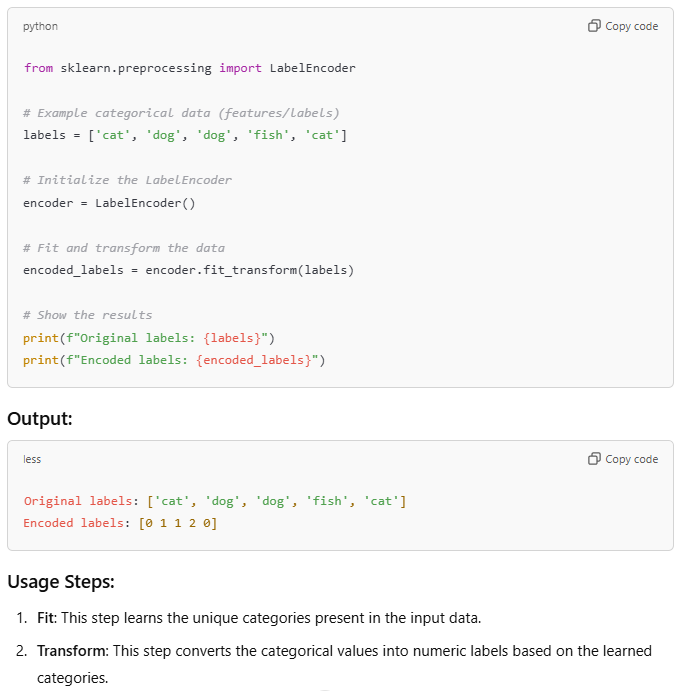

In [24]:
from IPython.display import display, Image
display(Image(filename='images/label_encoder.png'))

- By design, `LabelEncoder` should only be used for target (values to predict or output) variables and not for input features. Why?
  - The assignment of integer labels in `LabelEncoder` can be arbitrary. The encoder just assigns a unique integer to each category, and the **first category** it encounters gets label 0, the second gets label 1, and so on.
  - Strictly not be used for `Nominal Data`
    - Above example of 'cat', 'dog', 'fish' etc. are examples of **Nominal Data** i.e. there is no meaningful ordering or ranking between these values. The categories are **distinct and separate** but there is no inherent relationship or hierarchy between them. 
    - If `LabelEncoder` is used for such categorical data, it will get the numbers in the sequence or order in which it appears in the dataset. The problem arises as it might **mislead** the `model` to infer that somehow "cat" < "dog" < "fish" (because 0 < 1 < 2).
  - Could be used for `Ordinal Data` but terms and conditions apply!
    - `Ordinal Data` refers to categories that have a **meaningful order** or ranking between them. For example: "Low", "Medium", "High" etc.
    - However, if the dataset happens to have these values in order ["High", "Low", "Medium"], `LabelEncoder` will covert them into numbers like High = 0, Low = 1, Medium = 2
    - Now for ordinal data, we know a relationship exists i.e. Low < Medium < High. However, with `LabelEncoder` we get into the same problem as the model migh infer High < Low < Medium (since 0 < 1 < 2) which is incorrect.
    - One way to deal with it is, programmatically ordering the categorical data such that the sequence in which `LabelEncoder` finds the data is correct which we expect (i.e. preserve the **ordinal relationship**). However, it is overly complex and may lead to over-engineering. 
- `LabelEncoder` for target variables is best choice because the need for ordinal relationship is irrelevant between the categorical classification values it predicts. It is just as arbitrary number assigned to the output which is used further down the pipeline. The encoding is purely a representation, and the algorithm treats these values as distinct categories without assuming any inherent relationship.  

**Map**

- Use it when you want to take complete control and use specific `mapping` values between categorical values to numbers yourselves.
- You have full control here to indicate right relationship and in order which you need. For example,<br> 
  ```df["Temperature"] = df["Temperature"].map({"Low":0, "Medium":1,"High":2})```
- **Cons**: Could be used for small set of categories. Not practical to use where categories are unknown or has very large number of distinct values.

**pd.get_dummies() (also known as "one-hot encoding")**

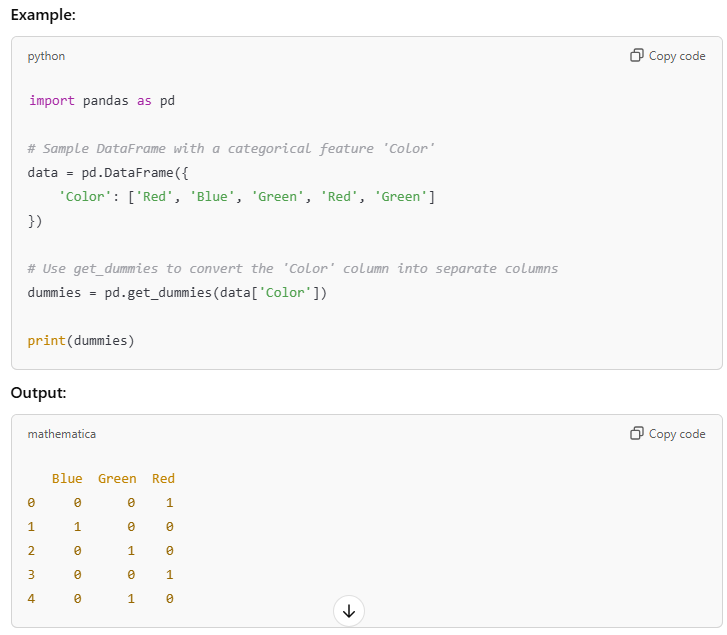

In [25]:
from IPython.display import display, Image
display(Image(filename='images/one-hot-encode.png'))

- Use `pd.get_dummies` when you have categorical variables and want to create multiple binary columns (one for each category). You can drop the unnecessary additional columns which will see later.
- Use when you want to **one-hot encode** categorical features (input variables). Example: Turning a "Color" column with "Red", "Blue", and "Green" into three separate columns.
- Advantages of **one-hot encoding**
  - It avoids any **ordinal interpretation** of categories.
  - **No bias** or misinterpretation introduced by numeric labels.

Now continuining with our cleaning of dataset...

In [26]:
# Manually mapping arrival date month
# Here we have used `map` function because one-hot encoding will create multiple columns for each month which will be too much data to handle and not required since we know the values of the months
category_cols_df["arrival_date_month"] = category_cols_df["arrival_date_month"].map(
        {
            "January":1, 
            "February":2, 
            "March":3, 
            "April":4,
            "May":5, 
            "June":6, 
            "July":7, 
            "August":8,
            "September":9, 
            "October":10, 
            "November":11,
            "December":12
        }
    )

C:\Users\deepak.agarwal\AppData\Local\Temp\ipykernel_22560\2984259740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_cols_df["arrival_date_month"] = category_cols_df["arrival_date_month"].map(


If you're using one-hot encoding in regression or other linear models, you can set drop_first=True to avoid multicollinearity (avoiding redundancy)

In [27]:
#one-hot encoding
# dtype 'int' is specified to convert text 'True' and 'False' to numbers 1 and 0 respectively. 
category_cols_df = pd.get_dummies(
    data=category_cols_df, 
    columns=[col for col in category_cols_df.columns if col != "arrival_date_month"],
    dtype=int,
    drop_first=True
)

In [28]:
category_cols_df.head()

,arrival_date_month,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_ALB,country_AND,country_ARE,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
4,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,7,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,7,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Now, all `object` columns are being one-hot encoded. To build final DataFrame, drop columns of type `object` which will be rest of the columns. Now, append this rest of the columns to the one-hot encoded columns.  

In [29]:
# rest of the columns dataframe
rest_of_the_cols = df.drop(
    columns=[col for col in df.columns if df[col].dtype=="object"], 
    axis=1
)

In [30]:
df = pd.concat(
    [
        rest_of_the_cols,
        category_cols_df
    ], 
    axis=1
)

In [31]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
6,0,0,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
7,0,9,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
8,1,85,2015,27,1,0,3,2,0.0,0,...,0,0,0,0,0,0,1,0,0,0
9,1,75,2015,27,1,0,3,2,0.0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,164,2017,35,31,2,4,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
119384,0,21,2017,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
119385,0,23,2017,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
119388,0,109,2017,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0


# Correlation Analysis

In [32]:
# create a correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
is_canceled,1.000000,0.158750,0.117930,0.016120,0.015940,0.011020,0.042867,NaN,NaN,NaN,...,0.012321,0.032093,0.023756,0.119839,0.006632,0.031410,0.132598,0.087213,1.000000,0.155755
lead_time,0.158750,1.000000,0.148936,0.084663,0.017308,0.227671,0.322176,NaN,NaN,NaN,...,0.007263,0.004892,0.013063,0.066102,0.014383,0.033282,0.094759,0.096981,0.158750,0.028230
arrival_date_year,0.117930,0.148936,1.000000,0.511117,0.013137,0.012135,0.012858,NaN,NaN,NaN,...,0.014803,0.007257,0.005923,0.003397,0.004138,0.047287,0.203510,0.100513,0.117930,0.011494
arrival_date_week_number,0.016120,0.084663,0.511117,1.000000,0.095203,0.035182,0.040666,NaN,NaN,NaN,...,0.004894,0.001663,0.005948,0.007555,0.007704,0.036054,0.082318,0.018419,0.016120,0.014763
arrival_date_day_of_month,0.015940,0.017308,0.013137,0.095203,1.000000,0.003426,0.008333,NaN,NaN,NaN,...,0.002868,0.000415,0.003624,0.014690,0.020212,0.003688,0.011162,0.002892,0.015940,0.004799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
customer_type_Group,0.031410,0.033282,0.047287,0.036054,0.003688,0.003244,0.011147,NaN,NaN,NaN,...,0.002448,0.003206,0.006776,0.005577,0.012886,1.000000,0.165089,0.020357,0.031410,0.003115
customer_type_Transient,0.132598,0.094759,0.203510,0.082318,0.011162,0.037727,0.047348,NaN,NaN,NaN,...,0.001075,0.010600,0.007239,0.014700,0.045062,0.165089,1.000000,0.791591,0.132598,0.011694
customer_type_Transient-Party,0.087213,0.096981,0.100513,0.018419,0.002892,0.028213,0.053331,NaN,NaN,NaN,...,0.004761,0.011639,0.008529,0.003850,0.055006,0.020357,0.791591,1.000000,0.087213,0.010713
reservation_status_Check-Out,1.000000,0.158750,0.117930,0.016120,0.015940,0.011020,0.042867,NaN,NaN,NaN,...,0.012321,0.032093,0.023756,0.119839,0.006632,0.031410,0.132598,0.087213,1.000000,0.155755


In [36]:
# Setting the threshold
threshold = 0.85

In [37]:
# Ensure only 1 of the highly correlated features get dropped
to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            colname = corr_matrix.columns[i]
            to_drop.append(colname)

In [38]:
to_drop

['reservation_status_year',
 'res_week_of_year',
 'arrival_date_month',
 'distribution_channel_Direct',
 'distribution_channel_TA/TO',
 'distribution_channel_TA/TO',
 'reservation_status_Check-Out']

In [39]:
# drop those columns
df.drop(columns=to_drop, inplace=True)

In [40]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_No-Show
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,9,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
8,1,85,2015,27,1,0,3,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
9,1,75,2015,27,1,0,3,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,164,2017,35,31,2,4,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
119384,0,21,2017,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
119385,0,23,2017,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
119388,0,109,2017,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0


# Intermediate Check 

In [35]:
# printing unique values of each column
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

is_canceled: 
[0 1]

lead_time: 
[ 14   0   9  85  75  23  35  37  12   7 127  48  60  77  96  69  15  70
  45  16 107 113  93  10  17   3  51  63  62 101   2  99   1  21 109  72
 102   4 115  86  52  92  30  73  33   8 100   5  97  64  39  90  29  27
 110 111  95  66  28 258  94 112  65  67  43  88  54 292  68  83 105 103
 249  22  91  11 106  79  34  44  36  71  40  59 116  31  81  13  24  50
  47  38  42  98 118  41  76  58  57  19   6  53  32  25 104  46  89  49
  61 108  55  18 130  74  87 119  56 136 129  84 124  78  82 140 114 139
 117 122 137 120  80 128 135 150 143 151 132 126 147 156  20  26 164 159
 160 161 154 163 142 144 248 175 146 170 166 148 165 172 121 149 178 123
 173 152 138 158 125 185 177 145 200 207 134 283 153 155 171 241 193 157
 194 261 209 131 215 133 187 223 169 168 230 203 192 232 219 196 190 228
 201 186 180 202 206 238 141 162 199 205 224 222 210 275 212 214 197 183
 208 229 218 167 189 179 246 255 188 288 253 174 260 236 256 235 234 254
 213 198 195 259 2